# Data Analysis Projekt
### FH Aachen - University of Applied Sciences

Datum: 28. Juli 2023 - Mahjoubi Asmae, Ben Amara Hafsa

## Introduction

<div style="border-left: 2px solid black; padding-left: 10px;">
Die Verkaufsleistung eines Unternehmens hängt von verschiedenen Faktoren ab, darunter
Preisstrategien, Werbekampagnen und Kundenverhalten. Die Analyse von Verkaufsdaten
kann wertvolle Erkenntnisse über diese Faktoren liefern und den Unternehmen helfen, ihre
Preis- und Werbestrategien zu optimieren. Das Projekt zielt darauf ab, Unternehmen dabei
zu unterstützen, Muster im Kundenverhalten anhand von Verkaufsdaten zu erkennen und
diese Informationen zur Optimierung ihrer Preis- und Werbestrategien zu nutzen.
    </div>

Wir haben unseren Datensatz von der [Kaggle-Website](https://www.kaggle.com/datasets/beekiran/sales-data-analysis) bezogen.

### Data Inspection/preparation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 7]

In [46]:
df = pd.read_csv("dataset_sales_analysis.csv")

In [3]:
df['Price Each'][:50]

0      11.95
1        NaN
2      99.99
3        600
4      11.99
5      11.99
6      11.95
7      99.99
8      11.95
9       1700
10     11.99
11       600
12     14.95
13    389.99
14      3.84
15     14.95
16       150
17     11.95
18       600
19     11.95
20      2.99
21       150
22       150
23       150
24      3.84
25     11.95
26       700
27     99.99
28      2.99
29       300
30     99.99
31     99.99
32      2.99
33       600
34    149.99
35    109.99
36     14.95
37       600
38       150
39     11.95
40     14.95
41     11.99
42     11.99
43       150
44     11.95
45      2.99
46     14.95
47    389.99
48     11.95
49     14.95
Name: Price Each, dtype: object

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [6]:
df.shape

(186850, 6)

Quantitativer Fall: Die Daten enthalten Hunderttausende von Einkäufen in Elektronikgeschäften (186305 Zeilen), aufgeschlüsselt nach Monat, Produkttyp, Kosten und Kaufadresse. Die Spalten sind wie folgt.

In [7]:
cols_list = list(df.columns.values)
cols_list

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

#### Data types von unseren Spalten

In [8]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Bei allen Spalten handelt es sich um Objekte, die als Strings identifiziert werden, aber in unserem Fall sollten einige Elemente wie "Ordered Quantity" und "Price Each" Integer- bzw. Float-Werte sein, die wir nach der Bereinigung des Datensatzes und dµer Eliminierung der NAN-Werte entsprechend umwandeln müssen

### Data Cleaning

#### 1. Handling missing values

In [10]:
nan_values = df[df.isna().any(axis=1)]
nan_values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


Der Datensatz enthält viele fehlende Werte. Wir verwenden den Befehl dropna(), um alle fehlenden Werte zu entfernen  

In [11]:
df_new = df.dropna(how = 'all')

In [12]:
df_new.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


<hr>

### In welchem Monat wurden die meisten Verkäufe getätigt?

<div style="border-left: 2px solid black; padding-left: 10px;">
Um herauszufinden, in welchem Monat die meisten Verkäufe getätigt wurden, müssen wir eine weitere Spalte "Monat" hinzufügen, die entsprechend aus der Spalte "Bestelldatum" extrahiert wird.
    </div>

In [13]:
df_new = df_new[df_new['Order Date'].str[0:2]!='Or']

df_new['month'] = df_new['Order Date'].str[0:2]
df_new['month'] = df_new['month'].astype('int32')
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Konvertierung von "Preis pro" und "Bestellte Menge" in numerische Werte, um die Spalte "Verkauf" hinzuzufügen, die die Verkaufszahlen für jedes unserer Produkte darstellt.

In [14]:
df_new["Price Each"] = pd.to_numeric(df_new["Price Each"])

In [15]:
df_new["Quantity Ordered"] = pd.to_numeric(df_new["Quantity Ordered"])

In [16]:
df_new["Sales"] = df_new["Quantity Ordered"] * df_new["Price Each"]

In [17]:
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


### Summary Statistics

In [19]:
df_new.describe()

,Quantity Ordered,Price Each,month,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140,185.490917
std,0.442793,332.731330,3.502996,332.919771
min,1.000000,2.990000,1.000000,2.990000
25%,1.000000,11.950000,4.000000,11.950000
50%,1.000000,14.950000,7.000000,14.950000
75%,1.000000,150.000000,10.000000,150.000000
max,9.000000,1700.000000,12.000000,3400.000000


array([[<AxesSubplot:title={'center':'Quantity Ordered'}>,
        <AxesSubplot:title={'center':'Price Each'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

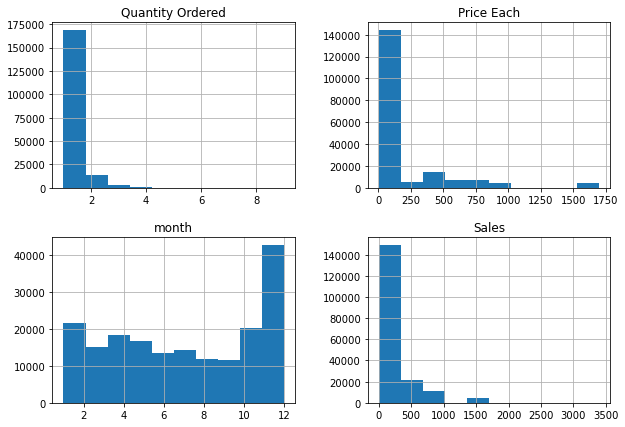

In [20]:
df_new.hist()

Data transformation step before finding the month with the highest number of sales

 # Data Transformation

## Z-score

Gathering all the needed columns of numeric type in a separate dataframe.

In [21]:
data= {'Quantity ordered' : df_new["Quantity Ordered"],'Price Each':df_new["Price Each"],'month' : df_new["month"],'Sales':df_new["Sales"]}

In [22]:
for_mean = pd.DataFrame(data)
for_mean.mean()

Quantity ordered      1.124383
Price Each          184.399735
month                 7.059140
Sales               185.490917
dtype: float64

In [23]:
normalized_df=(for_mean-for_mean.mean())/for_mean.std()
normalized_df[:20]

,Quantity ordered,Price Each,month,Sales
0,1.977488,-0.518285,-0.873292,-0.485375
2,-0.280906,-0.253687,-0.873292,-0.256821
3,-0.280906,1.249057,-0.873292,1.245072
4,-0.280906,-0.518165,-0.873292,-0.521149
5,-0.280906,-0.518165,-0.873292,-0.521149
6,-0.280906,-0.518285,-0.873292,-0.521269
7,-0.280906,-0.253687,-0.873292,-0.256821
8,-0.280906,-0.518285,-0.873292,-0.521269
9,-0.280906,4.555027,-0.873292,4.549171
10,-0.280906,-0.518165,-0.873292,-0.521149


#### Wir können feststellen, dass die bestellte Menge jedes Produkts meistens 1 ist.

Text(0.5, 1.0, 'Bar plot of sales for each month')

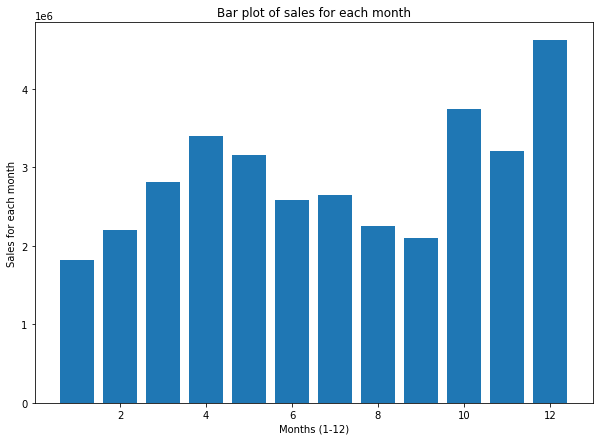

In [24]:
months = range(1,13)
groupby = df_new.groupby("month").sum()

plt.bar(months, groupby["Sales"])

plt.xlabel("Months (1-12)")
plt.ylabel("Sales for each month")

plt.title("Bar plot of sales for each month")

#### Another representation form : Plot

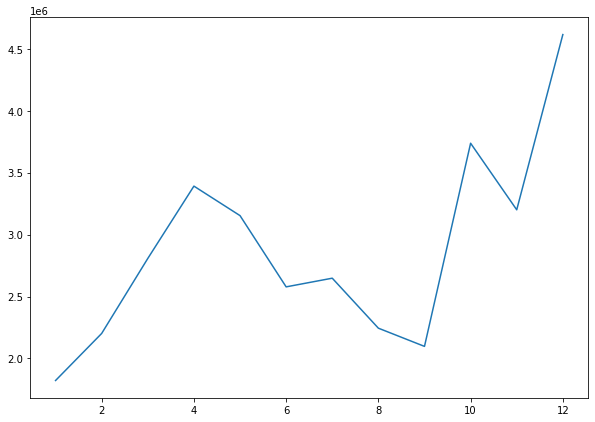

In [25]:
months = range(1,13)
groupby = df_new.groupby("month").sum()

plt.plot(months, groupby["Sales"])

<div style="border-left: 2px solid black; padding-left: 10px;">
Derzeit sind wir in der Lage, sowohl die höchsten als auch die niedrigsten Verkaufszahlen schnell zu ermitteln. Der Hauptzweck besteht darin, die Gründe für die Schwankungen in der Verkaufsleistung zwischen verschiedenen Monaten aufzudecken. Es ist möglich, dass erhöhte Ausgaben im April zu einem Anstieg der Produktverkäufe beigetragen haben. Außerdem könnte der Dezember, in dem Weihnachten gefeiert wird, die höchsten Verkaufszahlen für unsere Spitzenprodukte aufweisen. Dabei handelt es sich jedoch lediglich um Hypothesen, da wir nicht über ausreichende Daten verfügen, um sie zu belegen. 
    </div>

## Visualisierung der Daten

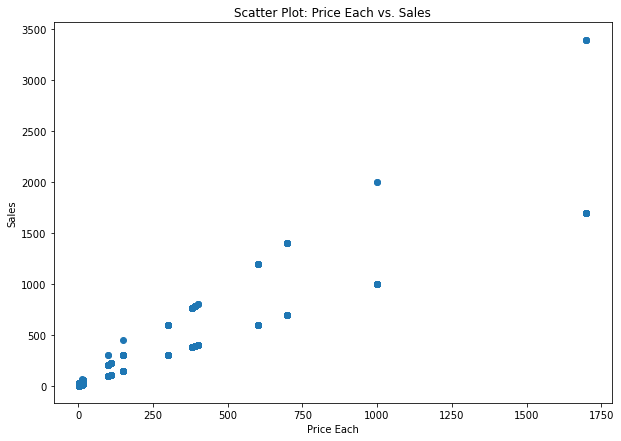

In [26]:
plt.scatter(data['Price Each'], data['Sales'])
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.title('Scatter Plot: Price Each vs. Sales')
plt.show()

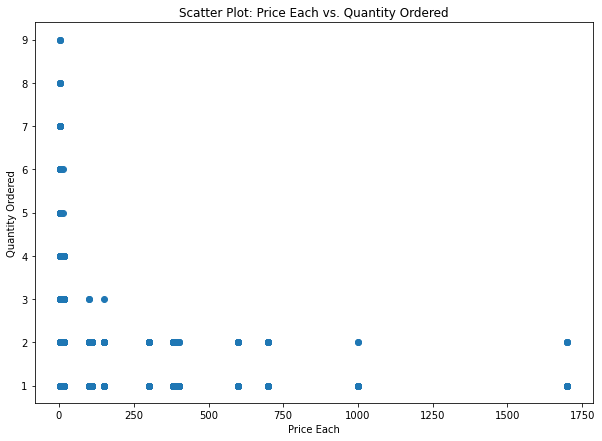

In [27]:
plt.scatter(df_new['Price Each'], df_new['Quantity Ordered'])
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.title('Scatter Plot: Price Each vs. Quantity Ordered')
plt.show()

### Korrelationsmatrix

In [28]:
df_new.corr(method='pearson', min_periods=1)

,Quantity Ordered,Price Each,month,Sales
Quantity Ordered,1.000000,-0.148272,0.000791,-0.139417
Price Each,-0.148272,1.000000,-0.003375,0.999203
month,0.000791,-0.003375,1.000000,-0.003466
Sales,-0.139417,0.999203,-0.003466,1.000000


<hr>

## What's the best advertising time ?

<div style="border-left: 2px solid black; padding-left: 10px;">
Wenn wir unsere Daten zur Beantwortung dieser Frage verwenden wollen, müssen wir den Zeitraum in 24-Stunden-Verteilung aggregieren. In der Spalte "Bestelldatum" gibt es Zeitangaben. Wir könnten sie wie zuvor extrahieren. Aber um es konsistenter zu machen, müssen wir die Spalte "Bestelldatum" in ein Datum-Zeit-Objekt umwandeln. Wir werden die Methode pd.to_datetime() verwenden.
    </div>

In [29]:
df_new["Order Date"] = pd.to_datetime(df_new["Order Date"])

In [30]:
df_new["time"] = df_new["Order Date"].dt.hour

In [31]:
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9


In [32]:
results = df_new.groupby(["time"]).count()
results.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
time,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854


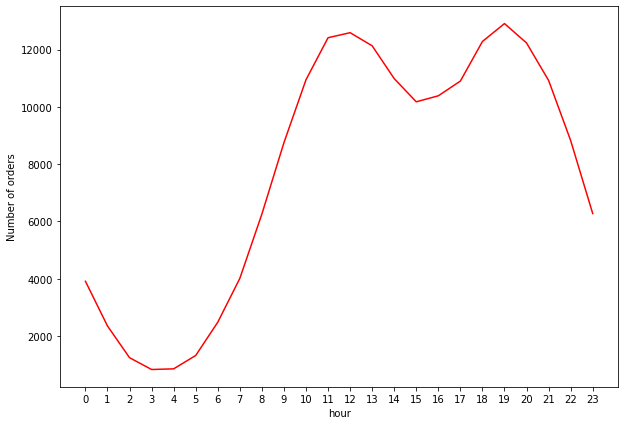

In [33]:
results = df_new.groupby(["time"])["Quantity Ordered"].count()
hours = [hour for hour, df in df_new.groupby('time')]

plt.plot(hours, results,c='red')
plt.xticks(hours)
plt.xlabel('hour')
plt.ylabel('Number of orders')

#24 hours scheme
plt.show()

<div style="border-left: 2px solid black; padding-left: 10px;">
Die Daten weisen etwa 2 Spitzenwerte auf. Sie liegen bei 12 (12 PM) und 19 (7 PM). Das macht Sinn, da die meisten Leute tagsüber einkaufen. Anhand dieser Daten können wir unserem Geschäftspartner vorschlagen, sein Produkt kurz vor 12 Uhr und/oder 19 Uhr zu bewerben. Es könnte 11.30 Uhr und/oder 18.30 Uhr sein.
    </div>

<hr>

## In welcher Stadt werden die meisten Produkte verkauft?

#### Die Kaufadresse enthält die Stadt. Wir müssen sie extrahieren.

In [34]:
df_new["city"]= df_new["Purchase Address"].apply(lambda x: x.split(',')[1])
df_new

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,time,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,20,Los Angeles
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,16,San Francisco
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,7,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,17,San Francisco


Bei jeder Stadt muss das Bundesland angegeben werden, zu dem sie gehört, damit es nicht zu Verwechslungen zwischen verschiedenen Städten kommt.

In [35]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df_new['city'] = df_new['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))

df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,time,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles CA


In [36]:
results2 = df_new.groupby('city').sum()
results2

,Quantity Ordered,Price Each,month,Sales,time
city,,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58,214264
Austin TX,11153,1809873.61,69829,1819581.75,141946
Boston MA,22528,3637409.77,141112,3661642.01,288225
Dallas TX,16730,2752627.82,104620,2767975.40,214390
Los Angeles CA,33289,5421435.23,208325,5452570.80,427444
New York City NY,27932,4635370.83,175741,4664317.43,357696
Portland ME,2750,447189.25,17144,449758.27,35211
Portland OR,11303,1860558.22,70621,1870732.34,144421
San Francisco CA,50239,8211461.74,315520,8262203.91,643265


San Francisco ist mit ca. 8.200.200 das meistverkaufte Produkt von allen Städten. Deshalb müssen wir visualisieren, um genau zu wissen, welche Stadt die meisten Verkäufe gemacht hat


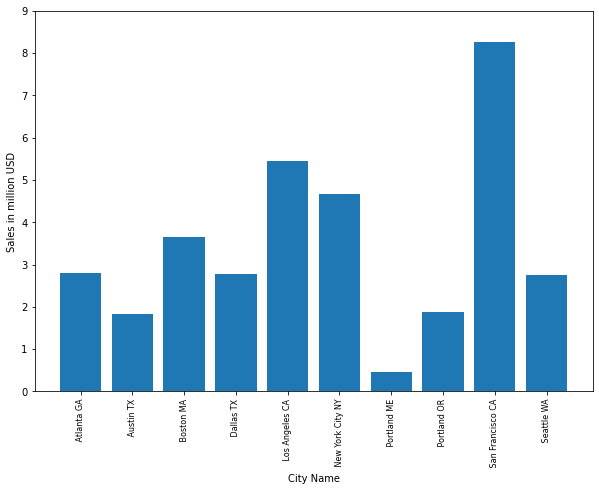

In [37]:
cities = [city for city, df in df_new.groupby('city')]

plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
labels, location = plt.yticks()
plt.yticks(labels,(labels/1000000).astype(int))
plt.ylabel('Sales in million USD')
plt.xlabel('City Name')
plt.show()

San Francisco hat die meisten Verkäufe gemacht. Das liegt vielleicht daran, dass die Werbung in San Francisco besser ist. Wir können diese Daten nutzen, um das Verkaufsgeschäft zu verbessern

# Predictive Modeling, zukünftige Verkäufe : Forecasting Sales over time.

In [38]:
df_new[["Order Date","Sales"]]

,Order Date,Sales
0,2019-04-19 08:46:00,23.90
2,2019-04-07 22:30:00,99.99
3,2019-04-12 14:38:00,600.00
4,2019-04-12 14:38:00,11.99
5,2019-04-30 09:27:00,11.99
...,...,...
186845,2019-09-17 20:56:00,8.97
186846,2019-09-01 16:00:00,700.00
186847,2019-09-23 07:39:00,700.00
186848,2019-09-19 17:30:00,379.99


In [39]:
year = df_new["Order Date"].dt.year
month = df_new["Order Date"].dt.year
day = df_new["Order Date"].dt.day

<div style="border-left: 2px solid black; padding-left: 10px;">
Der gegebene Code-Ausschnitt ist Teil eines Datenanalyse- und Predictive-Modeling-Prozesses. Der Fokus liegt auf der Vorhersage von Verkäufen mithilfe eines Random Forest Regressors, der ein maschinelles Lernverfahren ist und in der Lage ist, Regressionsaufgaben durchzuführen (d.h. die Vorhersage kontinuierlicher numerischer Werte).
    </div>

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df_new['Year'] = df_new['Order Date'].dt.year
df_new['Month'] = df_new['Order Date'].dt.month
df_new['Day'] = df_new['Order Date'].dt.day
X = df_new[['Quantity Ordered','Year','Month','Day','time','Price Each']]

y = df_new['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9117137343390694


100 Schätzer verwendet werden, was 100 Entscheidungsbäumen entspricht, um den mittleren quadratischen Fehler zwischen den Vorhersagen des Modells und den tatsächlichen Werten zu berechnen.
Der MSE beträgt 0,911, was ein guter Indikator für die Skala der Sales-Spalte ist.

In [41]:
y_pred.shape

(37190,)

In [42]:
y_test.shape

(37190,)

# Kunden Segmentierung : K-means Clustering Algorithmus

In [43]:
from sklearn.cluster import KMeans

current_date = df_new['Order Date'].max()

rfm_df = df_new.groupby('Order ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days, 
    'Order ID': 'count',                                  
    'Sales': 'sum'                                        
})


rfm_df.rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Sales': 'MonetaryValue'}, inplace=True)
rfm_normalized = (rfm_df - rfm_df.mean()) / rfm_df.std()

# K-means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)


print(rfm_df)

          Recency  Frequency  MonetaryValue  Cluster
Order ID                                            
141234        343          1         700.00        0
141235        337          1          14.95        0
141236        348          1          23.98        0
141237        360          1         149.99        0
141238        340          1          11.99        0
...           ...        ...            ...      ...
319666         20          1          14.95        1
319667         30          1           7.68        1
319668         22          1         400.00        1
319669         28          1          11.99        1
319670         10          1          99.99        1

[178437 rows x 4 columns]


In [44]:
rfm_df["Cluster"].unique()

array([0, 2, 1])

<div style="border-left: 2px solid black; padding-left: 10px;">
Cluster 0  : Kunden in diesem Segment haben höhere Werte für "Recency" (Aktualität), "Frequency" (Häufigkeit) und "MonetaryValue" (Wert). Dies deutet darauf hin, dass sie kürzlich, häufig und mit höherem Wert eingekauft haben. Diese Kunden sind wahrscheinlich wertvoll und treue Kunden.
    </div>

<div style="border-left: 2px solid black; padding-left: 10px;">
Cluster 1: Kunden in diesem Segment haben moderate Werte für "Recency", "Frequency" und "MonetaryValue". Sie sind möglicherweise nicht so aktuell, häufig oder wertvoll wie diejenigen in Cluster 0, zeigen jedoch immer noch eine angemessene Aktivität in Bezug auf ihr Einkaufsverhalten.
    </div>

<div style="border-left: 2px solid black; padding-left: 10px;">
Cluster 2: Kunden in diesem Segment haben niedrigere Werte für "Recency", "Frequency" und "MonetaryValue". Dies zeigt an, dass sie weniger aktuell, weniger häufig und mit geringerem Wert einkaufen. Diese Kunden sind wahrscheinlich Gelegenheitskäufer oder Kunden mit niedrigem Wert.
    </div>

Bei der Durchführung der K-Means-Clustering-Algorithmus gruppiert ähnliche Datenpunkte (Kunden) in Cluster basierend auf ihren Merkmalen (Recency, Frequency und MonetaryValue in diesem Fall). Die angegebene Anzahl von Clustern (in diesem Fall drei Cluster) teilt die Kunden in drei verschiedene Gruppen basierend auf ihren Ähnlichkeiten in den RFM-Metriken ein. Die Interpretation der Cluster ermöglicht es Ihnen, die Eigenschaften und Verhaltensweisen der Kunden in jeder Gruppe zu verstehen, was wertvoll für gezieltes Marketing und Kundenbindungstrategien sein kann.